<img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" align="left" height=100 width=200>

🚀 [**`Kaggle - Shelter Animal Outcomes`**](https://www.kaggle.com/competitions/shelter-animal-outcomes) 🚀

# 📚 Libraries

In [1]:
# DATA MANIPULTION 
import pandas as pd 
import numpy as np
import gzip

# DATA VIZ
import matplotlib.pyplot as plt
import seaborn as sns

# STATS
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

# MACHINE LEARNING
## PREPROCESSING
from sklearn.impute import SimpleImputer, KNNImputer
## MODEL SELECTION
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
## SCALERS
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
## CLASSIFICATION MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
## EVALUATION
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve
## MODEL TUNING
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#  🐈 Dataset

In [2]:
input_file = 'train.csv.gz'
output_file = 'train.csv'

with gzip.open(input_file, 'rb') as f_in:
    with open(output_file, 'wb') as f_out:
        f_out.write(f_in.read())

In [3]:
input_file = 'test.csv.gz'
output_file = 'test.csv'

with gzip.open(input_file, 'rb') as f_in:
    with open(output_file, 'wb') as f_out:
        f_out.write(f_in.read())

In [4]:
input_file = 'sample_submission.csv.gz'
output_file = 'sample_submission.csv'

with gzip.open(input_file, 'rb') as f_in:
    with open(output_file, 'wb') as f_out:
        f_out.write(f_in.read())

In [5]:
data_train = pd.read_csv('train.csv')
data_train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [6]:
data_test = pd.read_csv('test.csv')
data_test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [7]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,1,0,0,0,0
1,2,1,0,0,0,0
2,3,1,0,0,0,0
3,4,1,0,0,0,0
4,5,1,0,0,0,0


In [8]:
print(f'The shape of the data_train dataset is: {data_train.shape}')
print(f'The shape of the data_test dataset is: {data_test.shape}')
print(f'The shape of the sample_submission dataset is: {sample_submission.shape}')

The shape of the data_train dataset is: (26729, 10)
The shape of the data_test dataset is: (11456, 8)
The shape of the sample_submission dataset is: (11456, 6)


In [9]:
print(data_train.dtypes.value_counts())
print('--'*50)
print(data_test.dtypes.value_counts())
print('--'*50)
print(sample_submission.dtypes.value_counts())

object    10
dtype: int64
----------------------------------------------------------------------------------------------------
object    7
int64     1
dtype: int64
----------------------------------------------------------------------------------------------------
int64    6
dtype: int64


# 🧹 Cleaning the dataset

## 👥 Duplicates?

In [10]:
print(data_train.duplicated().sum())
print(data_test.duplicated().sum())
print(sample_submission.duplicated().sum())

0
0
0


## ❓ Missing values?

<AxesSubplot:>

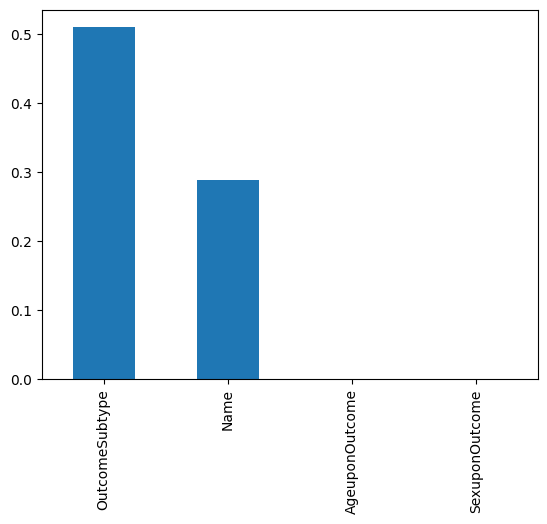

In [11]:
total_missing_data_train = (data_train.isna().sum()/len(data_train)).sort_values(ascending=False)
missing_mask_train = total_missing_data_train > 0
real_missing_values_train = total_missing_data_train[missing_mask_train]
real_missing_values_train.plot.bar()

<AxesSubplot:>

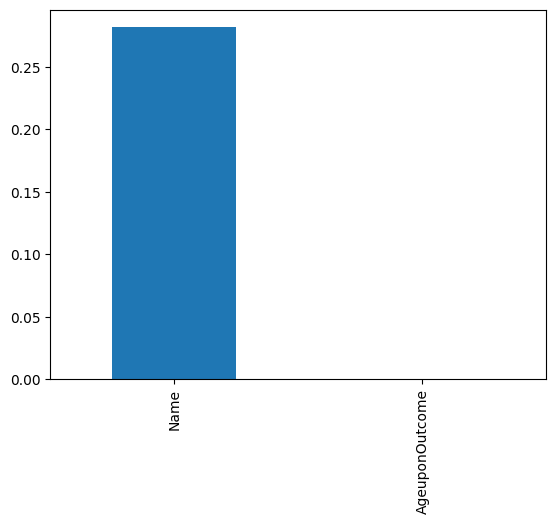

In [12]:
total_missing_data_test = (data_test.isna().sum()/len(data_test)).sort_values(ascending=False)
missing_mask_test = total_missing_data_test > 0
real_missing_values_test = total_missing_data_test[missing_mask_test]
real_missing_values_test.plot.bar()

**`Data_train 'OutcomeSubtype' & 'Name'`**

In [13]:
data_train["OutcomeSubtype"].value_counts()

Partner                7816
Foster                 1800
SCRP                   1599
Suffering              1002
Aggressive              320
Offsite                 165
In Kennel               114
Behavior                 86
Rabies Risk              74
Medical                  66
In Foster                52
Enroute                   8
Court/Investigation       6
At Vet                    4
In Surgery                3
Barn                      2
Name: OutcomeSubtype, dtype: int64

In [14]:
data_train['OutcomeSubtype'] = data_train.groupby(['OutcomeType'])['OutcomeSubtype'].apply(lambda x: x.fillna(x.mean()))

TypeError: can only concatenate str (not "int") to str

In [ ]:
simple_imputer_categorical = SimpleImputer(strategy="most_frequent")
simple_imputer_categorical.fit(data_train[["OutcomeSubtype"]])
data_train[["OutcomeSubtype"]] = simple_imputer_categorical.transform(data_train[["OutcomeSubtype"]])

In [ ]:
data_train.fillna('Unknown', inplace=True)

In [ ]:
data_train['OutcomeSubtype'].value_counts()

**`Data_train 'Name'`**